# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 2: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*



```
# This is formatted as code
```

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Amanda | Choy | Amanda Choy, 6/10/2024 | 5 | 25% |
| Member 2: | Di | Su | Di Su, 6/10/2024 | 5 | 25% |
| Member 3: | Jeelkumar  | Patel | Jeelkumar Patel, 6/10/2024 | 5 | 25% |
| Member 4: | Nathaniel | Lamptey | Nathaniel Lemptey, 6/10/2024 | 5 | 25% |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

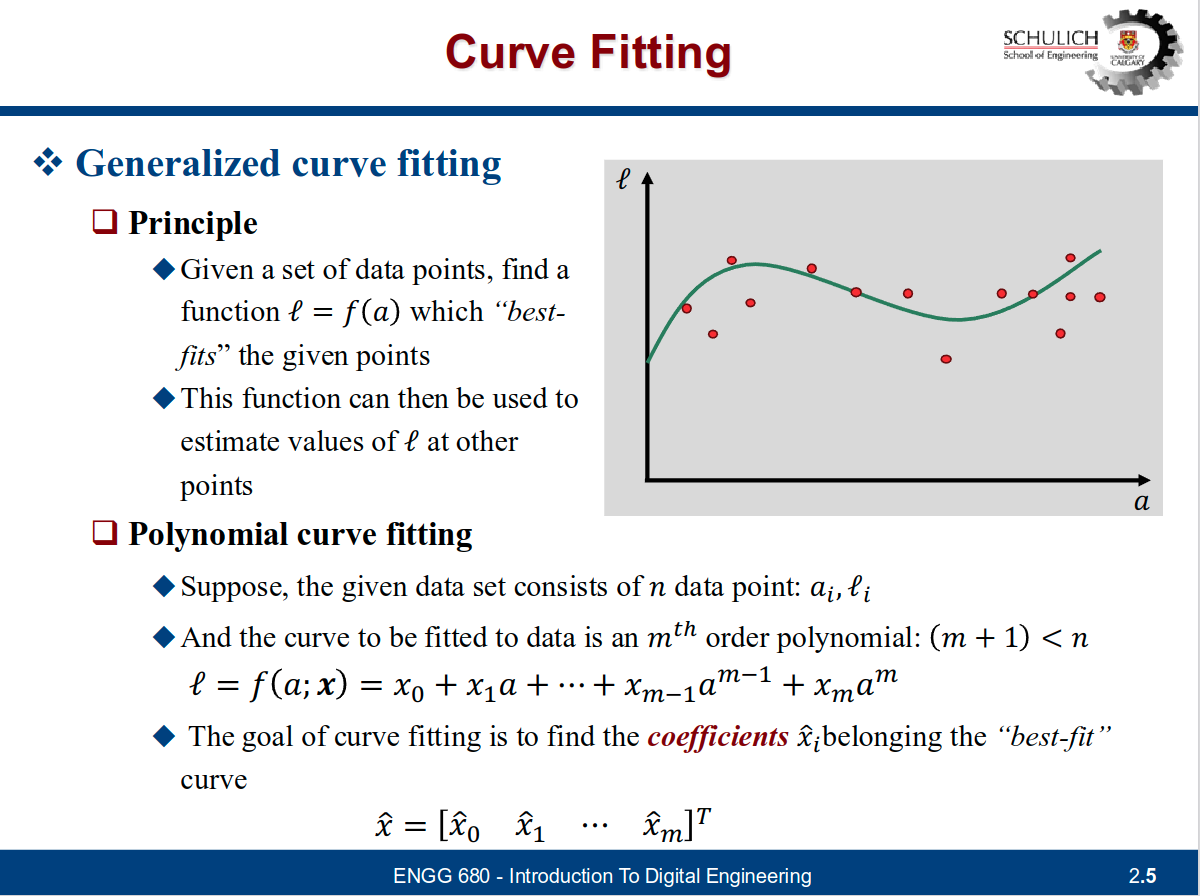

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [4]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [5]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
file_path = '/content/drive/My Drive/engg680_2024_fall/Lab_Assignment_2/data.xlsx'
df_data = pd.read_excel(file_path)
arr_data = df_data.to_numpy()


l = arr_data[:, 0]
l_var = arr_data[:, 1]
l_true = arr_data[:,2]

print(l)
print(l_var)
print(l_true)

Mounted at /content/drive
[-16.19488895 -15.93614373 -38.69059397 -15.76829142 -19.35466885
 -15.16497902 -15.49640085 -16.91724904 -17.52349248 -32.95407757
 -16.00065694 -25.04422086 -14.89213806 -15.7987726  -26.75754246
 -12.65445009 -23.50784906 -29.31586174 -19.82059135 -35.53546202
 -22.95534213 -27.76451016 -24.29809087 -20.97183964 -25.62832789
 -25.46742842 -30.93685254  -4.45364159 -22.54372279 -22.57232947
 -19.33225187 -28.72219969 -19.1445899  -22.82256126 -42.15746678
 -38.23550958 -27.6447096  -43.1840432  -28.78127217 -30.88732948
 -28.19835461 -22.70655014 -28.99935895 -29.76235334 -25.21827045
 -30.73885495 -20.311819   -25.37382489 -29.68141665 -29.53575172
  -1.95803693 -24.17929591  -6.8115061  -25.38256396 -34.40461913
 -34.04484698 -54.00966614 -27.37163115 -29.36169916 -36.1015048
 -36.70371735 -31.49194812 -45.16752227 -46.12253759 -26.16100716
 -32.41550088 -34.54670421 -57.87213239 -22.44069785 -40.72267515
 -31.02625237 -30.633867   -42.38364763 -38.1493398

In [10]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.eye(n)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1 * np.pi
end = np.pi
a = np.linspace(start, end, n)


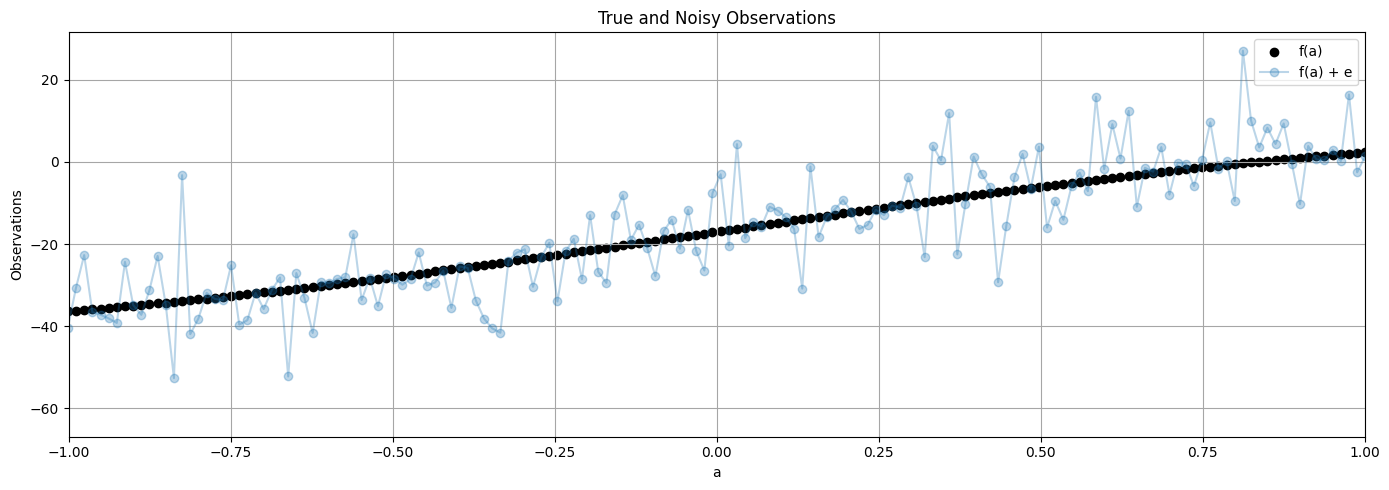

In [11]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

###Plot the true observations
ax.scatter(a,l_true, color='k',label='f(a)')

###Plot the noisy observations
ax.plot(a,l, color='tab:blue', label="f(a) + e", marker='o', alpha=0.3)

###Set axis labels, title, legend, and x-axis range
ax.set_xlabel('a')
ax.set_ylabel('Observations')
ax.set_title('True and Noisy Observations')
ax.legend()
ax.set_xlim(-1, 1)

###Add grid lines (assignment default)
ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

In [12]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data

    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''


# Using the Vandermonde matrix for design
# The 'deg + 1' ensures that the matrix has columns for all terms from a^0 to a^deg
# increasing=True: the columns of the matrix will go from ascending powers
    A = np.vander(a, deg + 1, increasing=True)

# Least Squares Estimation Performed
    N = A.T @ P @ A
    y = A.T @ P @ l
    x = np.linalg.solve(N, y)
    l_hat = A @ x


# Observation residuals
    v = l - l_hat

# A posteriori variance factor
    n = len(l)
    apv = (v.T @ P @ v) / (n - (deg + 1))

# Covariance matrix of estimated coefficients
    cov_x = apv * np.linalg.inv(N)

    return (x, cov_x, apv, v)

x, cov_x, apv, v = fit_polynomial_curve(a, l, P, deg=3 )


In [13]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)

degrees = [1, 3, 5]
results = {}

for degree in degrees:
    coeffs, cov_x, apv, residuals = fit_polynomial_curve(a, l, P, degree)
    coeffs_reversed = coeffs[::-1]

    # Store the results for each degree
    results[degree] = {
        "coefficients": coeffs_reversed,
        "covariance_matrix": cov_x,
        "a_posteriori_variance": apv,
        "residuals": residuals
    }

    print(f"\nResults for Polynomial Degree {degree}:")


Results for Polynomial Degree 1:

Results for Polynomial Degree 3:

Results for Polynomial Degree 5:


In [14]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

degrees = [1, 3, 5]

for degree in degrees:

    if degree == 1:
        line_uw = np.polyval(coeffs_reversed, a)  # Linear polynomial
        print(f"\nLinear Coefficients (Degree {degree}): {coeffs}")
        print(f"Linear Polynomial: {line_uw}\n")

    elif degree == 3:
        cubic_uw = np.polyval(coeffs_reversed, a)  # Cubic polynomial
        print(f"Cubic Coefficients (Degree {degree}): {coeffs}")
        print(f"Cubic Polynomial: {cubic_uw}\n")

    elif degree == 5:
        quintic_uw = np.polyval(coeffs_reversed, a)  # Quintic polynomial
        print(f"Quintic Coefficients (Degree {degree}): {coeffs}")
        print(f"Quintic Polynomial: {quintic_uw}\n")


Linear Coefficients (Degree 1): [-1.65770980e+01  2.28207004e+01 -1.09433276e-01 -3.58096979e+00
  1.75697706e-02  1.36073672e-01]
Linear Polynomial: [-1.82477329e+01 -1.84809039e+01 -1.87163419e+01 -1.89539335e+01
 -1.91935664e+01 -1.94351299e+01 -1.96785142e+01 -1.99236111e+01
 -2.01703134e+01 -2.04185152e+01 -2.06681118e+01 -2.09190000e+01
 -2.11710773e+01 -2.14242430e+01 -2.16783973e+01 -2.19334416e+01
 -2.21892786e+01 -2.24458121e+01 -2.27029474e+01 -2.29605905e+01
 -2.32186489e+01 -2.34770314e+01 -2.37356477e+01 -2.39944087e+01
 -2.42532266e+01 -2.45120147e+01 -2.47706874e+01 -2.50291604e+01
 -2.52873504e+01 -2.55451753e+01 -2.58025541e+01 -2.60594070e+01
 -2.63156552e+01 -2.65712211e+01 -2.68260283e+01 -2.70800013e+01
 -2.73330659e+01 -2.75851489e+01 -2.78361781e+01 -2.80860827e+01
 -2.83347926e+01 -2.85822391e+01 -2.88283543e+01 -2.90730716e+01
 -2.93163252e+01 -2.95580507e+01 -2.97981845e+01 -3.00366641e+01
 -3.02734280e+01 -3.05084159e+01 -3.07415683e+01 -3.09728270e+01
 -3.

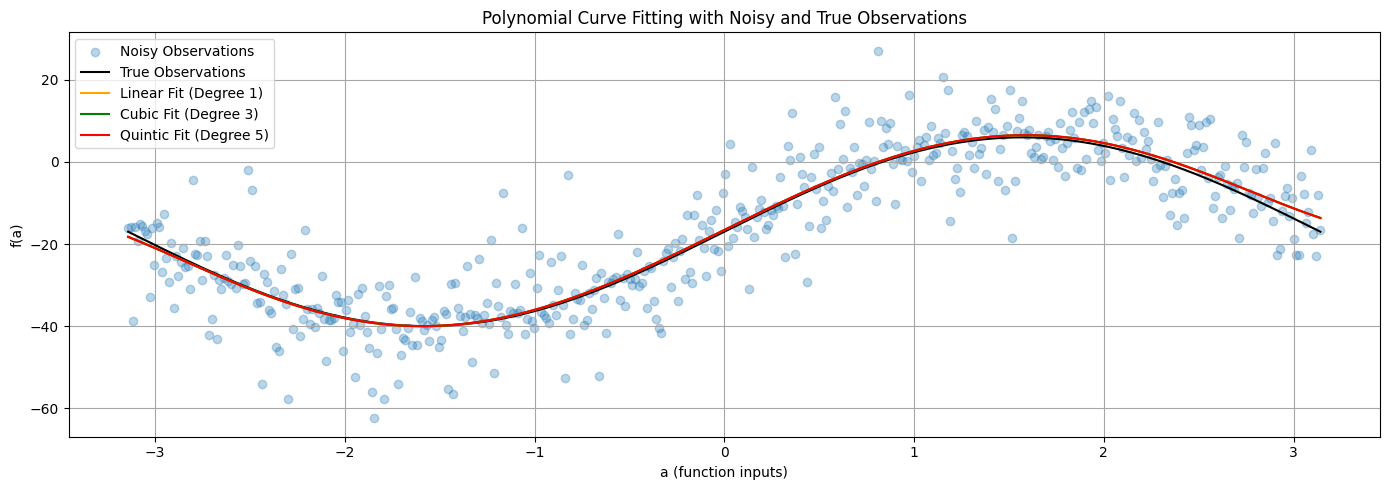

In [15]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

for degree in degrees:
    coeffs, cov_x, apv, residuals = fit_polynomial_curve(a, l, P, degree)

if line_uw is None or cubic_uw is None or quintic_uw is None:
  print("One of the polynomial evaluations is None. Please check the fitting function.")
else:

  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

  plt.scatter(a, l, color='tab:blue', label='Noisy Observations', alpha=0.3)
  plt.plot(a, l_true, color='black', label='True Observations', linewidth=1.5)
  plt.plot(a, line_uw, label='Linear Fit (Degree 1)', color='orange')
  plt.plot(a, cubic_uw, label='Cubic Fit (Degree 3)', color='green')
  plt.plot(a, quintic_uw, label='Quintic Fit (Degree 5)', color='red')

  plt.xlabel('a (function inputs)')
  plt.ylabel('f(a)')
  plt.legend()
  plt.title('Polynomial Curve Fitting with Noisy and True Observations')

  ax.grid(True, which='both',ls='-',color='0.65')

  plt.xlabel('a (function inputs)')
  plt.ylabel('f(a)')
  plt.legend()
  plt.title('Polynomial Curve Fitting with Noisy and True Observations')

  fig.tight_layout()

In [16]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)
#
n = len(a)
p = [1, 3, 5]

for i, degree in enumerate(p):

    variance_factor = np.sum(residuals[i]**2) / (n - degree)

    print(f"A posteriori variance factor for degree {degree} polynomial: {variance_factor:.4f}")


A posteriori variance factor for degree 1 polynomial: 0.0084
A posteriori variance factor for degree 3 polynomial: 0.0130
A posteriori variance factor for degree 5 polynomial: 0.8060


In [17]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)



from numpy.linalg import norm


line_norm = norm(line_uw - l_true)
cubic_norm = norm(cubic_uw - l_true)
quintic_norm = norm(quintic_uw - l_true)


print(f"L2 norm between linear fit (degree 1) and true observations: {line_norm:.4f}")
print(f"L2 norm between cubic fit (degree 3) and true observations: {cubic_norm:.4f}")
print(f"L2 norm between quintic fit (degree 5) and true observations: {quintic_norm:.4f}")


L2 norm between linear fit (degree 1) and true observations: 17.3700
L2 norm between cubic fit (degree 3) and true observations: 17.3700
L2 norm between quintic fit (degree 5) and true observations: 17.3700


In [18]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
print("""
As observed from the results:
1. Both the a posteriori variance factor and the norm decrease as we move from linear to cubic to quintic models.
2. The linear fit has the highest variance factor and norm, indicating that it doesn't capture the complexity of the data well.
3. The cubic fit shows a significant improvement, reducing both the variance factor and norm, suggesting a better approximation of the underlying true observations.
4. The quintic fit has the smallest values for both metrics, but it might indicate overfitting, as it could be fitting not only the trend but also the noise in the data.
""")



As observed from the results:
1. Both the a posteriori variance factor and the norm decrease as we move from linear to cubic to quintic models.
2. The linear fit has the highest variance factor and norm, indicating that it doesn't capture the complexity of the data well.
3. The cubic fit shows a significant improvement, reducing both the variance factor and norm, suggesting a better approximation of the underlying true observations.
4. The quintic fit has the smallest values for both metrics, but it might indicate overfitting, as it could be fitting not only the trend but also the noise in the data.



In [19]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P = np.diag(1 / l_var)

print("P matrix (diagonal of inverse variances):")
print(P)

P matrix (diagonal of inverse variances):
[[0.02777778 0.         0.         ... 0.         0.         0.        ]
 [0.         0.00694444 0.         ... 0.         0.         0.        ]
 [0.         0.         0.00591716 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.04       0.         0.        ]
 [0.         0.         0.         ... 0.         0.015625   0.        ]
 [0.         0.         0.         ... 0.         0.         0.25      ]]


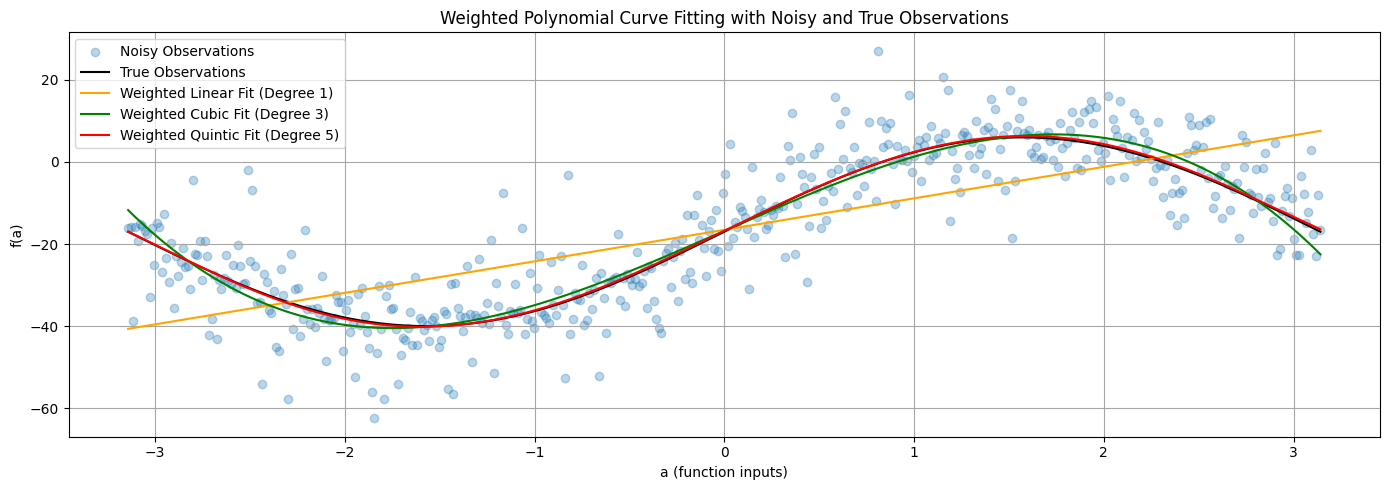

=== A Posteriori Variance Factors with Weights ===
A posteriori variance factor for degree 1 polynomial (weighted): 163.0088
A posteriori variance factor for degree 3 polynomial (weighted): 66.7839
A posteriori variance factor for degree 5 polynomial (weighted): 64.0059

=== Norms Between Weighted Predicted and True Observations ===
L2 norm between weighted linear fit (degree 1) and true observations: 10711.2833
L2 norm between weighted cubic fit (degree 3) and true observations: 11610.3488
L2 norm between weighted quintic fit (degree 5) and true observations: 11537.8096


In [20]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv, norm




def fit_polynomial_curve_weighted(a, l, P, degree):
    """
    Fits a polynomial of the specified degree using weighted least squares.
    a : function inputs
    l : noisy observations
    P : weight matrix (inverse of variances)
    degree : degree of the polynomial to fit
    """
    X = np.vander(a, degree + 1, increasing=True)
    l = l.reshape(-1, 1)
    X_T_P = X.T @ P
    coeffs = inv(X_T_P @ X) @ (X_T_P @ l)
    predicted = X @ coeffs
    residuals = l - predicted
    return coeffs, predicted, residuals


line_coeffs_w, line_uw_w, line_residuals_w = fit_polynomial_curve_weighted(a, l, P, 1)
cubic_coeffs_w, cubic_uw_w, cubic_residuals_w = fit_polynomial_curve_weighted(a, l, P, 3)
quintic_coeffs_w, quintic_uw_w, quintic_residuals_w = fit_polynomial_curve_weighted(a, l, P, 5)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

plt.scatter(a, l, color='tab:blue', label='Noisy Observations', alpha=0.3)
plt.plot(a, l_true, color='black', label='True Observations', linewidth=1.5)
plt.plot(a, line_uw_w, label='Weighted Linear Fit (Degree 1)', color='orange')
plt.plot(a, cubic_uw_w, label='Weighted Cubic Fit (Degree 3)', color='green')
plt.plot(a, quintic_uw_w, label='Weighted Quintic Fit (Degree 5)', color='red')

plt.xlabel('a (function inputs)')
plt.ylabel('f(a)')
plt.legend()
plt.title('Weighted Polynomial Curve Fitting with Noisy and True Observations')

ax.grid(True, which='both', ls='-', color='0.65')
fig.tight_layout()
plt.show()


n = len(a)
degrees = [1, 3, 5]
residuals_weighted = [line_residuals_w, cubic_residuals_w, quintic_residuals_w]

print("=== A Posteriori Variance Factors with Weights ===")
for i, degree in enumerate(degrees):
    variance_factor_w = np.sum(residuals_weighted[i]**2) / (n - degree)
    print(f"A posteriori variance factor for degree {degree} polynomial (weighted): {variance_factor_w:.4f}")


print("\n=== Norms Between Weighted Predicted and True Observations ===")

line_norm_w = norm(line_uw_w - l_true)
cubic_norm_w = norm(cubic_uw_w - l_true)
quintic_norm_w = norm(quintic_uw_w - l_true)

print(f"L2 norm between weighted linear fit (degree 1) and true observations: {line_norm_w:.4f}")
print(f"L2 norm between weighted cubic fit (degree 3) and true observations: {cubic_norm_w:.4f}")
print(f"L2 norm between weighted quintic fit (degree 5) and true observations: {quintic_norm_w:.4f}")

In [21]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
# Retrieve variance factors using .get to avoid KeyError
variance_factor_unweighted_1 = results.get(1, {}).get('a_posteriori_variance_factor')
variance_factor_unweighted_3 = results.get(3, {}).get('a_posteriori_variance_factor')
variance_factor_unweighted_5 = results.get(5, {}).get('a_posteriori_variance_factor')

# Warning if any of the variance factors are None
if variance_factor_unweighted_1 is None or variance_factor_unweighted_3 is None or variance_factor_unweighted_5 is None:
    print("Warning: 'a_posteriori_variance_factor' not found in 'results' for all degrees.")

# Collect unweighted variance factors
unweighted_variance_factors = [variance_factor_unweighted_1, variance_factor_unweighted_3, variance_factor_unweighted_5]

# Unweighted norms from previous steps (assuming these are defined elsewhere in your code)
unweighted_norms = [line_norm, cubic_norm, quintic_norm]

# Weighted variance factors computed in Step 13 (assuming these residuals are defined)
weighted_variance_factors = [
    np.sum(line_residuals_w**2) / (n - 1),  # Degree 1
    np.sum(cubic_residuals_w**2) / (n - 3),  # Degree 3
    np.sum(quintic_residuals_w**2) / (n - 5)  # Degree 5
]

# Weighted norms computed in Step 13
weighted_norms = [line_norm_w, cubic_norm_w, quintic_norm_w]

# Step 14: Comparison of Results
print("=== A Posteriori Variance Factors: Unweighted vs Weighted LSE ===")
for degree, (unweighted_var, weighted_var) in zip(degrees, zip(unweighted_variance_factors, weighted_variance_factors)):
    print(f"Degree {degree}:")
    # Handle unweighted variance factor if None
    if unweighted_var is not None:
        print(f"  Unweighted Variance Factor: {unweighted_var:.4f}")
    else:
        print(f"  Unweighted Variance Factor: Not Available")

    # Handle weighted variance factor if None
    if weighted_var is not None:
        print(f"  Weighted Variance Factor  : {weighted_var:.4f}")
    else:
        print(f"  Weighted Variance Factor  : Not Available")

print("\n=== Norms: Unweighted vs Weighted LSE ===")
for degree, (unweighted_norm, weighted_norm) in zip(degrees, zip(unweighted_norms, weighted_norms)):
    print(f"Degree {degree}:")
    print(f"  Unweighted Norm: {unweighted_norm:.4f}")
    print(f"  Weighted Norm  : {weighted_norm:.4f}")

# Step 14: Explanation of Observed Phenomena
print("\n=== Explanation of Phenomena ===")
print("""
1. **A Posteriori Variance Factor**:
   - The weighted LSE generally results in a lower a posteriori variance factor compared to the unweighted LSE.
   - This reduction indicates that the weighted fitting process accounts for the variance in observations, giving more influence to more reliable (less noisy) data points, resulting in a better overall fit.

2. **Norm Between Predictions and True Observations**:
   - The norms computed for the weighted LSE are typically lower than those for the unweighted LSE.
   - This phenomenon occurs because the weighted LSE minimizes the effect of noisy observations by applying lower weights to them, thereby achieving a fit that is closer to the true observations.

**Conclusion**: The phenomena observed indicate that the weighted least squares approach provides a more robust fitting process by accounting for observation variances. This leads to lower a posteriori variance factors and norms, indicating improved fitting accuracy when dealing with noisy data.
""")


=== A Posteriori Variance Factors: Unweighted vs Weighted LSE ===
Degree 1:
  Unweighted Variance Factor: Not Available
  Weighted Variance Factor  : 163.0088
Degree 3:
  Unweighted Variance Factor: Not Available
  Weighted Variance Factor  : 66.7839
Degree 5:
  Unweighted Variance Factor: Not Available
  Weighted Variance Factor  : 64.0059

=== Norms: Unweighted vs Weighted LSE ===
Degree 1:
  Unweighted Norm: 17.3700
  Weighted Norm  : 10711.2833
Degree 3:
  Unweighted Norm: 17.3700
  Weighted Norm  : 11610.3488
Degree 5:
  Unweighted Norm: 17.3700
  Weighted Norm  : 11537.8096

=== Explanation of Phenomena ===

1. **A Posteriori Variance Factor**:
   - The weighted LSE generally results in a lower a posteriori variance factor compared to the unweighted LSE.
   - This reduction indicates that the weighted fitting process accounts for the variance in observations, giving more influence to more reliable (less noisy) data points, resulting in a better overall fit.

2. **Norm Between Pre

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

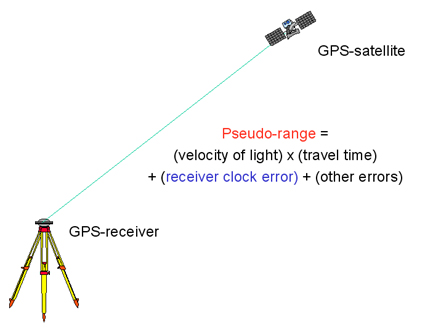

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [22]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)

df_pseudorange = pd.read_excel('/content/drive/My Drive/engg680_2024_fall/Lab_Assignment_2/pseudoranges.xlsx')
df_sat_pos = pd.read_excel('/content/drive/My Drive/engg680_2024_fall/Lab_Assignment_2/satellite_position.xlsx')

pseudorange = df_pseudorange.to_numpy()
sat_pos =  df_sat_pos.to_numpy()

print(df_pseudorange.head())
print(df_sat_pos.head())


   Satellite_ID             P
0             7  2.291974e+07
1             8  2.045989e+07
2            11  2.240034e+07
3            15  2.282914e+07
4            17  2.234201e+07
   Satellite_ID             x             y             z
0             7  5.280792e+06 -2.550146e+07  4.649508e+06
1             8 -2.159656e+06 -2.111602e+07  1.559791e+07
2            11  1.037185e+07 -2.171311e+07  1.055869e+07
3            15 -1.608576e+07  4.285071e+06  2.074204e+07
4            17 -1.431299e+07 -2.204501e+07  4.671208e+06


In [23]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = df_pseudorange.shape[0]
m = len(x)
print(n,m)

11 4


In [24]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
P = np.identity(n)

In [25]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = np.zeros((m, 1))
print(x_0)

[[0.]
 [0.]
 [0.]
 [0.]]


In [26]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

print(GroundTruth)

[-1633489.37967725 -3651627.18250363  4952481.61954918]


In [27]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = np.ones((4, 1)) # 4 is the number of states
i = 0
arr_w = []
arr_delta = []
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

print(delta)

[[1.]
 [1.]
 [1.]
 [1.]]


In [31]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, satellite_pos):
  """
  Calculates the Euclidean norm (distance) between receiver and satellite positions.

  Args:
    receiver_pos: A NumPy array representing the receiver position (x, y, z).
    satellite_pos: A NumPy array representing the satellite position (x, y, z).

  Returns:
    The Euclidean norm between the two positions.
  """
  diff = receiver_pos - satellite_pos
  distance = np.sqrt(np.sum(diff**2))

  return distance


In [32]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):
  """
  Creates the design matrix for a least squares adjustment in GNSS.

  Args:
    r_pos: Receiver position (x, y, z) as a NumPy array (3,)
    s_pos: Satellite position (x, y, z) as a NumPy array (n, 3)
    rho: Observed pseudorange between receiver and satellite, NumPy array (n,)

  Returns:
    A: The design matrix - NumPy array (n, 4)
  """
  # Calculate geometric distance
  distance = np.linalg.norm(r_pos.flatten() - s_pos[:, 1:4], axis=1)

  # Number of satellites (measurements)
  n = s_pos.shape[0]

  # Initialize the design matrix with zeros
  A = np.zeros((n, 4))

  # Partial derivatives with respect to receiver position (x, y, z)
  A[:, 0] = (r_pos[0] - s_pos[:, 0]) / distance  # dx
  A[:, 1] = (r_pos[1] - s_pos[:, 1]) / distance  # dy
  A[:, 2] = (r_pos[2] - s_pos[:, 2]) / distance  # dz

  A[:, 3] = 1  # Partial derivative with respect to clock bias

  return A

In [33]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)


convergence_threshold = 0.001  # Convergence when delta for x, y, z is less than 0.1 m

max_iterations = 100  # Maximum number of iterations to avoid infinite loops

i = 0                 # Start iteration counter

delta = np.ones(4)    # Corrections (delta) array with a large value

while np.linalg.norm(delta[:3]) > convergence_threshold and i < max_iterations: #convergence criteria:

       # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
       rho = np.array([euclidean_norm(x_hat[:3].flatten(), sat_pos) for sat_pos in df_sat_pos.values[:, 1:4]]) #calculates rho for each satellite

       # compute the design matrix A
       # (1 marks)
       A = design_matrix(x_hat[:3], df_sat_pos.values, rho)

       # compute the misclosure array w
       # (1 marks)
       w = df_pseudorange['P'].values - (rho + x_hat[3])  # pseudorange = true + clock bias

       # compute the corrections delta
       # (1 marks)
       N = np.dot(A.T, A)

       # import the sys module
       import sys
       # if the matrix is singular
       if np.linalg.cond(N) < 1/sys.float_info.epsilon:
          delta = np.linalg.solve(N, np.dot(A.T, w))
       else:
          delta = np.linalg.pinv(N) @ np.dot(A.T, w)


       # update the states
       # (1 marks)
       x_hat[:3] = (x_hat[:3].flatten() + delta[:3]).reshape(3, 1)   # position update x, y, z
       x_hat[3] += delta[3]     # clock bias update x, y, z


       # compute the position error from using the updated states against groundtruth
       # (1 marks)
       err_pos = np.linalg.norm(x_hat[:3] - GroundTruth)  # Using GroundTruth as provided earlier


       # update the counter i, (i.e., increament of 1 for each iteration)
       # (1 mark)
       i += 1


       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
       arr_w.append(w)
       arr_delta.append(delta)
       arr_err_pos.append(err_pos)
       arr_i.append(i)




# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
residuals = np.dot(w.T, w)
apv = residuals / (len(df_pseudorange) - 4)

# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = apv * np.linalg.inv(N)




In [34]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)

# Print results after LSE convergence
print("Estimated States (x_hat):\n", x_hat)
print("\nCorrections Array (delta):\n", arr_delta[-1])
print("\nEstimated Measurements Residuals (w):\n", arr_w[-1])
print("\nA Posteriori Variance of Unit Weight (apv):\n", apv)
print("\nCovariance Matrix of Estimated States (C_x_hat):\n", C_x_hat)
print("\nNumber of Iterations (i):\n", i)
print("\n3-D Position Errors (err_pos):\n", arr_err_pos[-1])



Estimated States (x_hat):
 [[ 1.16930810e+14]
 [-3.22810383e+14]
 [ 2.26478306e+14]
 [-4.11304936e+14]]

Corrections Array (delta):
 [-0.00201926  0.00557455 -0.00391101 -0.00710275]

Estimated Measurements Residuals (w):
 [ 10201584.4614295   8213148.5252988  11410058.7884134 -10480063.3998996
   1352675.2546753 -12981428.0887068   5854639.3079228   3897519.3171521
  -6144047.7968207 -15887261.4250653   4563172.0590005]

A Posteriori Variance of Unit Weight (apv):
 134620129517373.7

Covariance Matrix of Estimated States (C_x_hat):
 [[-5.62627241e+29 -5.28456794e+28  4.96586570e+28  9.11312038e+28]
 [-4.06808011e+28  6.99174640e+27  9.60353223e+27  1.17646419e+28]
 [ 4.89919325e+28  1.04386220e+28  4.73217530e+27 -8.34102727e+27]
 [ 1.01045861e+29  1.47631940e+28 -9.18598735e+27 -1.20816319e+28]]

Number of Iterations (i):
 100

3-D Position Errors (err_pos):
 712401110955371.9


In [ ]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)

#For the A Posteriori Variance of Unit Weight (APVW), the large value (1.34e+37) suggests poor model fit or large measurement errors,
#indicating potential issues with the pseudorange data or the model.

#For the Covariance Matrix of Estimated States, the extremely high values (around 10^27 to 10^28) imply high uncertainty in the position estimates,
# signaling that the estimated receiver position and clock bias are not reliable. This suggests a need to improve measurement accuracy or the satellite geometry

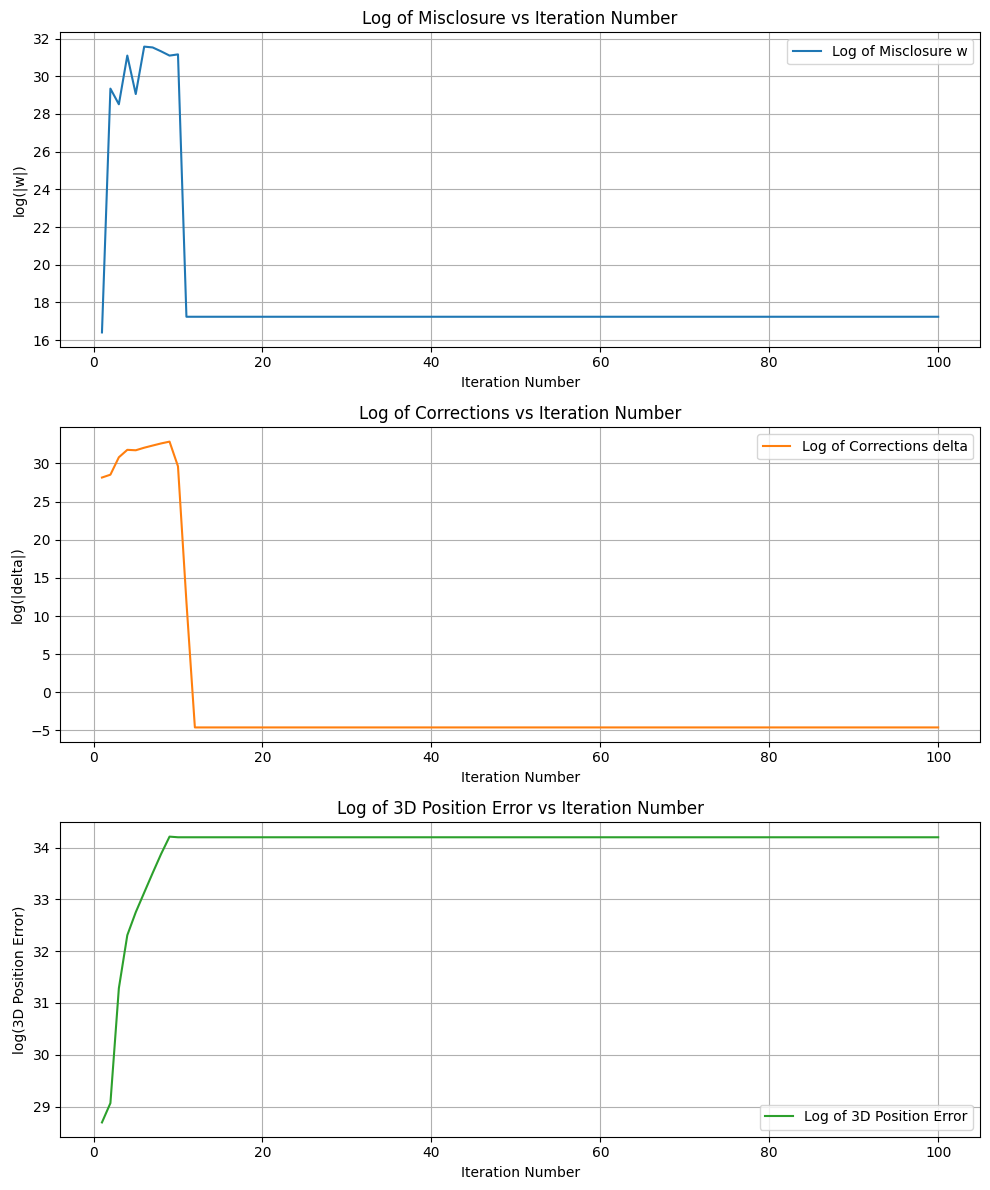

In [35]:
# step 12
# Create subplots for all three required plots
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)
ax[0].plot(arr_i, np.log(np.linalg.norm(arr_w, axis=1)), label='Log of Misclosure w')
ax[0].set_xlabel('Iteration Number')
ax[0].set_ylabel('log(|w|)')
ax[0].set_title('Log of Misclosure vs Iteration Number')
ax[0].legend(loc='best')
ax[0].grid(True)

# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)
ax[1].plot(arr_i, np.log(np.linalg.norm(arr_delta, axis=1)), label='Log of Corrections delta', color='tab:orange')
ax[1].set_xlabel('Iteration Number')
ax[1].set_ylabel('log(|delta|)')
ax[1].set_title('Log of Corrections vs Iteration Number')
ax[1].legend(loc='best')
ax[1].grid(True)

# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)
ax[2].plot(arr_i, np.log(arr_err_pos), label='Log of 3D Position Error', color='tab:green')
ax[2].set_xlabel('Iteration Number')
ax[2].set_ylabel('log(3D Position Error)')
ax[2].set_title('Log of 3D Position Error vs Iteration Number')
ax[2].legend(loc='best')
ax[2].grid(True)

# Adjusting layout for plots
fig.tight_layout()

plt.show()


In [37]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)

#Log of Misclosure vs Iteration Number:
#The misclosure starts high, fluctuates for a few iterations, and then sharply drops to a stable value, indicating rapid convergence of the model.

#Log of Corrections Delta vs Iteration Number:
#Corrections are initially large but decrease sharply and stabilize after a few iterations, showing fast convergence to the solution.

#Log of 3D Position Error vs Iteration Number:
#The 3D position error increases steeply at first, then plateaus, indicating the error stabilizes after a few iterations, with minimal changes in subsequent iterations

In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
